In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

<function matplotlib.pyplot.show(close=None, block=None)>

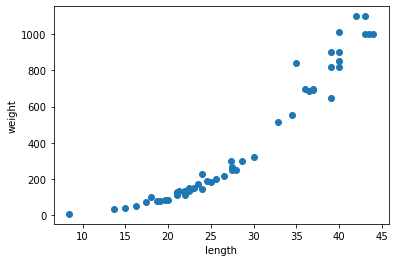

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length'); plt.ylabel('weight')
plt.show

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [10]:
ex=[1,2,3,4,5,5,6,7,8]
np.reshape(ex,(-1,1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [5],
       [6],
       [7],
       [8]])

# K-최근접 이웃 회귀의 원리
#### 등급을 모르는 새로운 데이터가 들어오면 거리 공식(Distance Formula)을 통해 가장 가까운 k개의 이웃을 찾는거다.
#### 분류에는 이웃의 레이블 개수를 확인해서 다수결로 정했지만, 회귀에서는 이웃들의 평균을 계산한다는 점에서 차이가 있다.
#### 만얀 가장 가까운 (특성이 유사한)3개의 이웃이 5.0, 6.8, 9.2의 등급을 가졌다면 이것의 평균 7이라고 예상한다.

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [16]:
knr.score(test_input, test_target)

0.992809406101064

# 가중 회귀 (Weighted Regression)
#### 가까운 이웃들의 단순한  평균을 구하는게 아니라 각 이웃이 얼마나 가까이 있는지에 따라 가중 평균(weighted average)을 구하면, 거리가 가까울수록 데이터가 더 유사할 것이라고 보고 가중치를 부여하는 것이다.

In [17]:
from sklearn.metrics import mean_absolute_error
# mean_absolute_error 는 타깃과 예측의 절대값 오차를 평균하여 반환

# 테스트 세트에 대한 예측을 만든다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산한다
mae = mean_absolute_error(test_target, test_prediction)
mae

# 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다.

19.157142857142862

In [18]:
knr.score(train_input, train_target)

0.9698823289099254

In [19]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [20]:
# 앞서 이웃의 개수(기본)이 5개일때는 훈련 세트의 점수보다 테스트 세트의 점수가 높아 과소적합 문제가 발생했지만
# 이웃의 개수를 3으로 줄여서 모델을 복잡하게 만듬으로써 테스트 세트의 점수가 훈련 세트보다 낮아져서 과소적합 문제를 해결 하였다.
# 그리고 두 세트의 점수의 차가 크지 않으므로 과대적합 문제도 발생하지 않았다.
knr.score(test_input, test_target)

0.9746459963987609

In [21]:
# 선형회귀
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [22]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [24]:
# 위 모델로 길이가 50cm인 농어의 무게를 에측하니까 1033.333으로 나온다.
knr.predict([[50]])

array([1033.33333333])

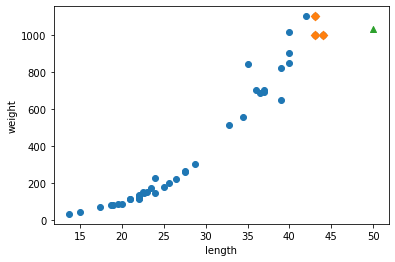

In [25]:

import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length'); plt.ylabel('weight')
plt.show()

In [26]:
np.mean(train_target[indexes])


1033.3333333333333

In [27]:
knr.predict([[100]])
# k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균내기 때문에 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측한다
# 그래서 100이여도 1033.333값을 예측하는데 50이랑 똑같다.

array([1033.33333333])

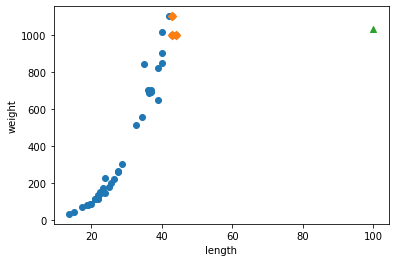

In [28]:

# 100cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length'); plt.ylabel('weight')
plt.show()

# 선형 회귀
회귀는 연속적인 타잇을 예측하는 알고리즘이다. 그 중에 선형 회귀(Linear Regression)이 가장 기본이 된다. 선형 회귀는 훈련 데이터에 가장 잘 들어맞는 선형 방정식을 찾는 문제이다. 
얼마나 잘 들어 맞는지를 측정 방법으로는 평균 제곱 오차(Mean Squear Error, MSE)를 사용한다. 이런 측정 함수를 비용 함수라한다.
선형 회귀의 비용 함수인 평균 제곱 오차를 최소화하는 선형 방정식의 w를 찾아야한다 .해석적인 방법으로 해를 구할 수 있다. 비용 함수를 
미분하여 도함수가 0이 되는 점을 찾는다 .


In [90]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
lr.predict([[50]])

array([1241.83860323])

In [91]:
lr.coef_, lr.intercept_

(array([39.01714496]), -709.0186449535477)

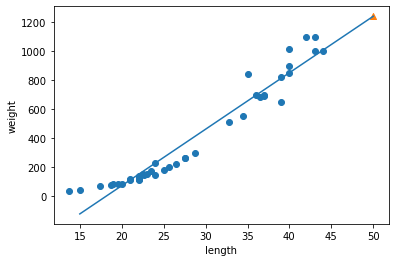

In [92]:

# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그린다
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length'); plt.ylabel('weight')
plt.show()

In [93]:
print(lr.score(train_input, train_target)) # 훈련 세트에 대한 R^2(결정계수) 점수
print()
print(lr.score(test_input, test_target)) # 테스트 세트에 대한 R^2(결정계수) 점수

0.939846333997604

0.8247503123313558


In [94]:
# 최적의 직선이 아닌 최적의 곡선을 찾기 위해 길이를 제곱한 항을 각 세트에 붙여본다.
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [97]:
print(train_poly.shape, test_poly.shape) # 원래 특성인 길이를 제곱하여 원쪽 열에 추가했기때문에 두 세트  열이 2개로 늘어남.
print(train_poly, test_poly)

(42, 2) (14, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]] [[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21

In [98]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50**2, 50]]) # 농어 길이의 제곱값과 원래 길이를 함께 넣어 주어야 한다.

array([1573.98423528])

In [99]:
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.05021078278259)

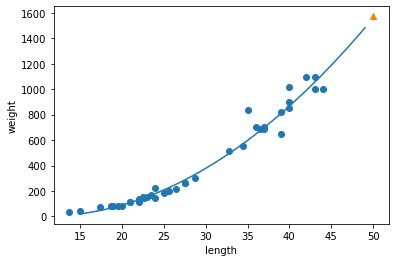

In [29]:
#구간 별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15,50)

# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 15에서 50까지 2차 방정식 그래프를 그린다
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length'); plt.ylabel('weight')
plt.show()

In [100]:
print(lr.score(train_poly, train_target))
print()
print(lr.score(test_poly, test_target))
#선형 회귀 때ㅜ 보다 각 세트에 대한 점수가 높아졌지만 테스트 점수가 조금 더 높으므로 과소적합이 남아있다.

0.9706807451768623

0.9775935108325121


# -------------------------------------------------예시---------------------------------------------------

In [32]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [37]:
housing=fetch_california_housing()

In [38]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [ ]:
75% 는 훈련 세트  25%는 테스트 세트로 분리
그래프로ㅗ 나타내기 편하도록 하나의 편성만 사용하겠다. 사이킷런의 모델

In [45]:
X_train,X_test,y_train,y_test=train_test_split(housing.data[:,0:1],housing.target,random_state=42)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(15480, 1) (5160, 1) (15480,) (5160,)


# 정규 방정식을 이용하여 평균 제곱 오차가 최소가 되는 모델 파라미터 w를 구하기
먼저 훈련 데이터 X_train에 절편에 해당하는 x0=1ㅇ을 추가하고 np.ones()와 np.hstack()함수를 사용하면 쉽게 X_train의 첫 번째 열에 1로 채워진 벡터를 추가할 수있다

In [51]:
x0= np.ones((X_train.shape[0],1))
X=np.hstack((x0,X_train))

In [57]:
print(X.shape)

(15480, 2)


정규 방정식에 나오는 전치 행렬은 넘파이 배열에서 바로 변환 가능. 역행렬은 넘파이에 있는 선형 대수 모듈 아래 inv() 함수를 사용하여 구함

In [62]:
w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)
print(w)

[0.44967564 0.41788087]


X_train, y_train으로 산점도를 그리고 학습된 방정식을 나타내기 위해 (0,w[0]에서 (10,10*w[1]+w[0]))을 지나는 직선 그래프 그리기

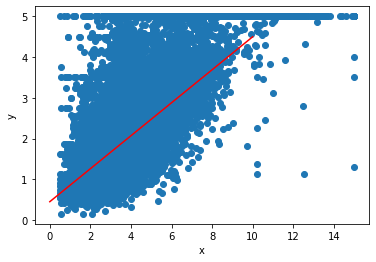

In [63]:
plt.scatter(X_train,y_train)
plt.plot([0,10],[w[0],10*w[0]],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 사이킷런의 LinaerRegression 클래스는 사이파이의 lstsq()함수를 사용하여 선형 회귀 문제를 푼다.
이 함수는 특잇값 분해(SVD)방식을 사용하여 유사 역행열을 계산, 사이킷런의 모델 클래스를 사용할때 x0값을 고려하지 않아도 된다. 


In [67]:
lr=LinearRegression()


In [69]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.47083837938023376

사이킷런의 회귀 모델 클래스들은 RegressorMixin 클래스를 상속한다. 이 클래스는 결정계수 R^2점수를 계산하는 score()메서드를 제공한다. 결정계수(Coefficient of determination)는 -1~1사이의 값을 가진다. 
#### R^2= 1-sum(y-y^)^2/sum(y-ybar)^2---->ybar는 타깃 데이터의 평균

In [73]:
y_pred= lr.predict(X_test)
r2=1-((y_test-y_pred)**2).sum()/((y_test-y_test.mean())**2).sum()
print(r2)

0.47083837938023376


#### LInearRegression 클래스가 구한 모델 파라미터는 가중치와 절편이 coef_와 intercept_인스턴스 변수에 따로 저장되어 있다. 하나의 특성만 사용했기 때문에 구해진 가중치 배열의 원소가 하나이다.

In [77]:
print(lr.coef_,lr.intercept_)# coef_ :가중치 ,intercept_ : 절편

[0.41788087] 0.4496756419968613


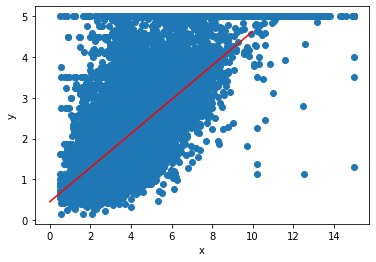

In [81]:
plt.scatter(X_train,y_train)
plt.plot([0,10],[lr.intercept_,10*lr.coef_+lr.intercept_],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

입력 데이터 의 최소,최대값 사이가 0을 포함하지 않을 수 있기 때문에 LinearRegession 클래스는 의미있는 절편을 구하기 위해서 훈련 데이터의 평균을 원점에 맞춘다. fit()메서드에 입력된 훈련 데이터는 참조에 의한 전달이 된다. 원본 데이터를 변경하지 않으려면 훈련 데이터를 복사 사용해야한다. 
LinearRegression 클래스의 copy_X 매개변수에 이를 조정할 수 있으며 기본값은 True로 훈련데이터를 복사하여 사용해야 한다.

fit_intercept 매개변수를 기본값 True에서 False로 바꾸면 절편을 계산하지 않는다. 데이터셋이 원점에 맞추어져 있을 때 사용 할 수 있다.

In [84]:
lr_no_intercept=LinearRegression(fit_intercept=False)
lr_no_intercept.fit(X_train,y_train)
print(lr_no_intercept.coef_,lr_no_intercept.intercept_)

[0.51131441] 0.0


C:\Users\seonwoo\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


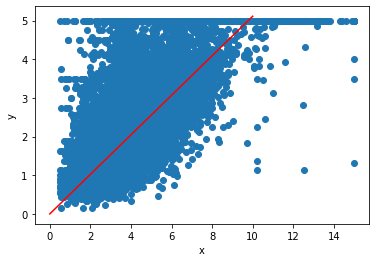

In [87]:
plt.scatter(X_train,y_train)
plt.plot([0,10],[lr_no_intercept.intercept_,10*lr_no_intercept.coef_+lr_no_intercept.intercept_],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### normalize 매개변수를 기본값 False에서 True로 바꾸면 각 특성에서 평균을 빼고 L2 노름으로 나누어 정규화한다. 
### 각 특성은 L2 노름이 1이 된다. 